# Import Modules

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from autora.experimentalist.sampler.uncertainty import uncertainty_sampler

# Define Meta-Space

We will here define X values of interest as well as a ground truth model to derive y values.

In [2]:
#Define meta-parameters
X = np.linspace(start=-3, stop=6, num=10).reshape(-1, 1)

#Define ground truth model
def ground_truth(xs):
    y = (xs ** 2.0)
    y[xs < 0] = 0
    return y

# Plot the Data

Let's plot the data to see what we are working with.

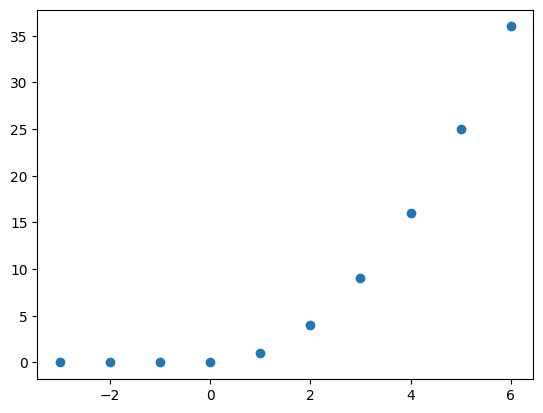

In [3]:
plt.plot(X, ground_truth(X), 'o')
plt.show()

# Define and Fit Theorist

Next, we initialize the theorist and then train it on the data. 

In [16]:
%%capture

#Initiate theorists
lr_theorist = LogisticRegression()

#Fit theorists
lr_theorist.fit(X,ground_truth(X))

# Plot Theorists on Data

We can then plot the theorist to see how well it recovered the data.

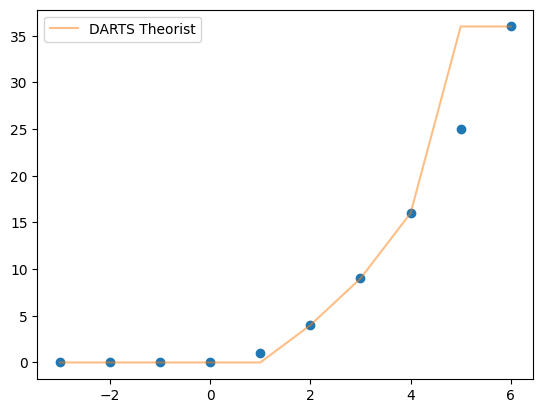

In [17]:
plt.plot(X, ground_truth(X), 'o')
plt.plot(X, lr_theorist.predict(X), alpha = .5, label = 'DARTS Theorist')
plt.legend()
plt.show()

# Run and Report Uncertainty Samples

Now we will get a proposal from the sampler as to which datapoints to investigate next. We will retrieve 5 new datapoints in this example.

In [18]:
sampler_proposal = uncertainty_sampler(X, lr_theorist, 5)

print('New datapoints:\n' + str(sampler_proposal))

New datapoints:
[[3.]
 [2.]
 [4.]
 [5.]
 [1.]]


# Plot New Datapoints With Old

We can then plot our new datapoints with our previous ones to demonstrate our new dataset of investigation for then next cycle.

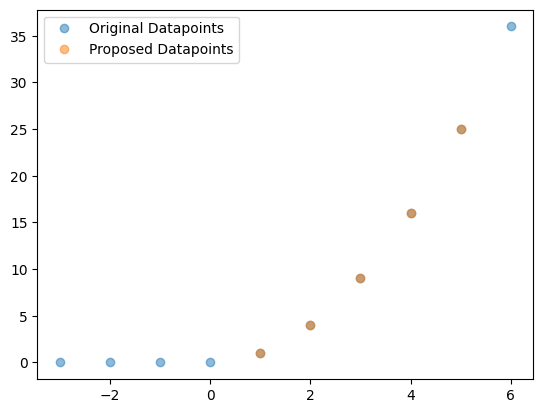

In [19]:
plt.plot(X, ground_truth(X), 'o', alpha = .5, label = 'Original Datapoints')
plt.plot(sampler_proposal, ground_truth(sampler_proposal), 'o', alpha = .5, label = 'Proposed Datapoints')
plt.legend()
plt.show()